# Step 1: Data Cleaning and Preprocessing

In [1]:
import json
import pandas as pd

# Load the data
file_path = 'Facebook.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Inspect the data structure
df = pd.json_normalize(data)
df.head()

,timestamp,attachments,data,title,tags
0,1636662325,[{'data': [{'media': {'uri': 'your_facebook_ac...,"[{'update_timestamp': 1636662325}, {}, {}]",Sandhya Karthikeyan shared a post.,NaN
1,1636683225,[{'data': [{'media': {'uri': 'your_facebook_ac...,"[{'update_timestamp': 1636683225}, {}, {}]",Sandhya Karthikeyan shared a post.,NaN
2,1636687519,[{'data': [{'media': {'uri': 'your_facebook_ac...,"[{'update_timestamp': 1636687519}, {}, {}]",Sandhya Karthikeyan shared a post.,NaN
3,1636692209,[{'data': [{'media': {'uri': 'your_facebook_ac...,"[{'update_timestamp': 1636692209}, {}, {}]",Sandhya Karthikeyan shared a post.,NaN
4,1636699702,[{'data': [{'media': {'uri': 'your_facebook_ac...,"[{'update_timestamp': 1636699702}, {}, {}]",Sandhya Karthikeyan shared a post.,NaN


# Data Cleaning Steps

In [2]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['timestamp'].head()

0   2021-11-11 20:25:25
1   2021-11-12 02:13:45
2   2021-11-12 03:25:19
3   2021-11-12 04:43:29
4   2021-11-12 06:48:22
Name: timestamp, dtype: datetime64[ns]

In [3]:
# Define a function to extract media URI from the attachments

def extract_media_uri(attachments):
    if isinstance(attachments, list) and attachments:
        if 'data' in attachments[0] and 'media' in attachments[0]['data'][0]:
            return attachments[0]['data'][0]['media'].get('uri', None)
    return None

# Define a function to extract update_timestamp from the data column

def extract_update_timestamp(data):
    if isinstance(data, list) and data:
        if 'update_timestamp' in data[0]:
            return pd.to_datetime(data[0]['update_timestamp'], unit='s')
    return None

# Define a function to extract text within 'post' key for each row
def extract_post_text(data_entry):
    texts = []
    if isinstance(data_entry, list):
        for item in data_entry:
            if isinstance(item, dict):
                for key, value in item.items():
                    if key == 'post' and isinstance(value, str):
                        texts.append(value)
    return ' '.join(texts).strip()

In [4]:
# Apply the updated functions to the attachments ,data and post columns
df['media_uri'] = df['attachments'].apply(extract_media_uri)
df['update_timestamp'] = df['data'].apply(extract_update_timestamp)
df['post'] = df['data'].apply(extract_post_text)

In [5]:
# Display the first few rows of the DataFrame to inspect the changes
df[['timestamp', 'media_uri', 'update_timestamp','post']].tail(35)

,timestamp,media_uri,update_timestamp,post
406,2022-05-24 09:35:11,your_facebook_activity/posts/media/stickers_us...,2022-05-24 09:35:11,
407,2023-08-18 05:22:39,your_facebook_activity/posts/media/Mobileuploa...,NaT,Forever that girl that never gets tired of wat...
408,2022-08-22 10:08:01,your_facebook_activity/posts/media/Mobileuploa...,NaT,While running behind the Cholas history....the...
409,2022-05-27 14:18:57,your_facebook_activity/posts/media/Timelinepho...,NaT,ð Murudeshwar Temple ðï¸\n#blessed #spi...
410,2022-04-25 07:40:56,your_facebook_activity/posts/media/Timelinepho...,NaT,#beyourself \nLife is too short to be someone ...
411,2022-03-08 09:27:06,your_facebook_activity/posts/media/Mobileuploa...,NaT,#weddingseason2022 \n#dressupdarling \n#ethnic...
412,2021-11-25 05:51:11,None,NaT,Bangalore days...ð¯
413,2021-08-14 15:57:32,your_facebook_activity/posts/media/Mobileuploa...,NaT,Letâs wander where the wi-fi is weak. #vacat...
414,2021-07-18 10:11:15,your_facebook_activity/posts/media/Mobileuploa...,NaT,Beauty begins the moment you decide to be your...
415,2021-06-20 10:35:34,your_facebook_activity/posts/media/Mobileuploa...,NaT,Elegance never goes out of style !


# Step 3 Exploratory Data Analysis (EDA)

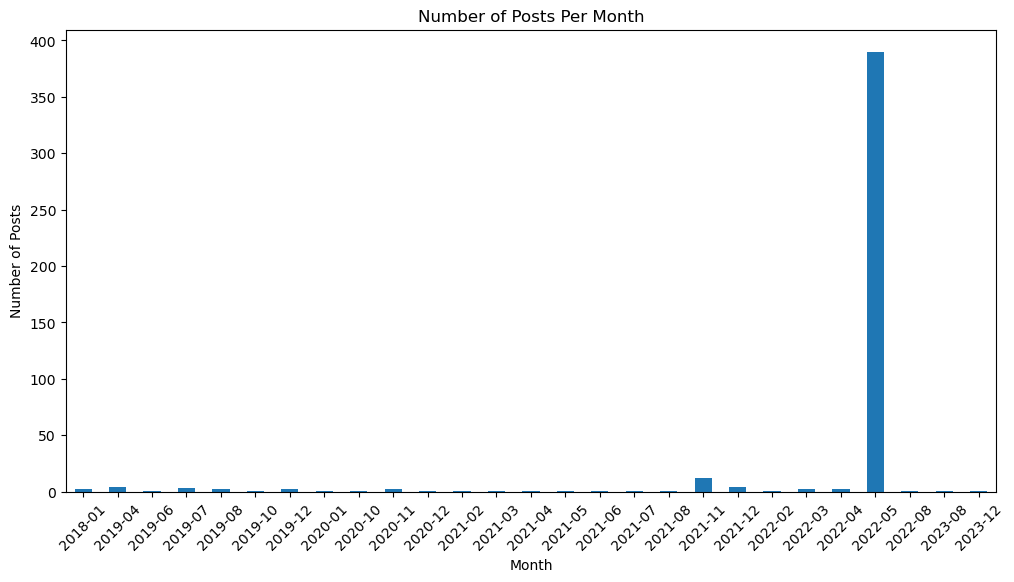

In [6]:
import matplotlib.pyplot as plt

# Plot the frequency of posts over time
plt.figure(figsize=(12, 6))
df['timestamp'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Number of Posts Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

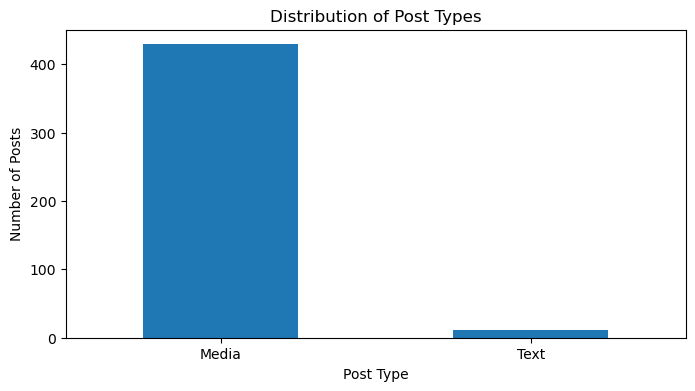

In [7]:
# Categorize posts based on the presence of media_uri
df['post_type'] = df['media_uri'].apply(lambda x: 'Media' if pd.notnull(x) else 'Text')

# Display the distribution of post types
post_type_counts = df['post_type'].value_counts()

# Plot the distribution of post types
plt.figure(figsize=(8, 4))
post_type_counts.plot(kind='bar')
plt.title('Distribution of Post Types')
plt.xlabel('Post Type')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

# Step 4: Sentiment Analysis

In [8]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from cleantext import clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Filter rows with extracted post content for inspection
extracted_post_content = df[['timestamp', 'post']].dropna()
extracted_post_content = extracted_post_content[extracted_post_content['post'] != '']

In [11]:
print(extracted_post_content)

              timestamp                                               post
407 2023-08-18 05:22:39  Forever that girl that never gets tired of wat...
408 2022-08-22 10:08:01  While running behind the Cholas history....the...
409 2022-05-27 14:18:57  ð Murudeshwar Temple ðï¸\n#blessed #spi...
410 2022-04-25 07:40:56  #beyourself \nLife is too short to be someone ...
411 2022-03-08 09:27:06  #weddingseason2022 \n#dressupdarling \n#ethnic...
412 2021-11-25 05:51:11                              Bangalore days...ð¯
413 2021-08-14 15:57:32  Letâs wander where the wi-fi is weak. #vacat...
414 2021-07-18 10:11:15  Beauty begins the moment you decide to be your...
415 2021-06-20 10:35:34                 Elegance never goes out of style !
416 2021-04-03 15:40:49  Chin up Princess or the crown slips...ð\n#n...
417 2021-03-14 19:29:21  Iâm a life-sized doll. And no, you canât p...
418 2021-02-27 20:30:35  She's the kind of girl whose light doesn't hav...
419 2020-12-06 10:39:42  

In [12]:
def data_processing(post):
    post = str(post)
    post = post.lower()
    post = re.sub(r"https\S+|www\S+https\S+", '',post, flags=re.MULTILINE)
    post = re.sub(r'\@w+|\~','',post)
    post = re.sub(r'[^\w\s]','',post)
    post = clean(post,no_emoji=True)
    post_tokens = word_tokenize(post)
    filtered_post = [w for w in post_tokens if not w in stop_words]
    return " ".join(filtered_post)

In [13]:
extracted_post_content.post = extracted_post_content['post'].apply(data_processing)

In [14]:
print(extracted_post_content)

              timestamp                                               post
407 2023-08-18 05:22:39  forever girl never gets tired watching sunsets...
408 2022-08-22 10:08:01  running behind cholas historythe world forget ...
409 2022-05-27 14:18:57  murudeshwar temple di blessed spiritual adiyog...
410 2022-04-25 07:40:56                 beyourself life short someone else
411 2022-03-08 09:27:06        weddingseason2022 dressupdarling ethnicwear
412 2021-11-25 05:51:11                                    bangalore daysd
413 2021-08-14 15:57:32  letas wander wifi weak vacationflashback heave...
414 2021-07-18 10:11:15  beauty begins moment decide smileallday beachh...
415 2021-06-20 10:35:34                          elegance never goes style
416 2021-04-03 15:40:49  chin princess crown slipsd neverlookdown heads...
417 2021-03-14 19:29:21  iam lifesized doll canat play med mommysgirl j...
418 2021-02-27 20:30:35  shes kind girl whose light doesnt switch bebri...
419 2020-12-06 10:39:42  

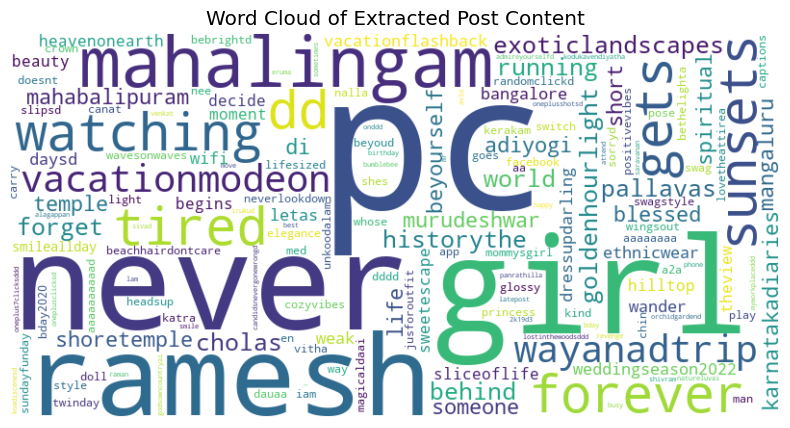

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all extracted post content into a single string
all_posts_text = ' '.join(extracted_post_content['post'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_posts_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Extracted Post Content')
plt.show()

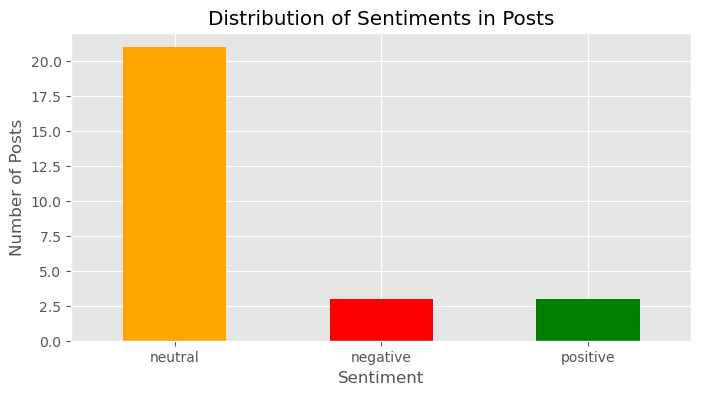

In [16]:
# Define a function to get the sentiment of a text
def get_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

# Apply the function to the extracted post content
extracted_post_content['sentiment'] = extracted_post_content['post'].apply(get_sentiment)

# Display the distribution of sentiments
sentiment_counts = extracted_post_content['sentiment'].value_counts()

# Define colors for each sentiment
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'orange'}

# Plot the distribution of sentiments
plt.figure(figsize=(8, 4))
sentiment_counts.plot(kind='bar', color=[colors.get(x, 'grey') for x in sentiment_counts.index])
plt.title('Distribution of Sentiments in Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

# Sentiment Analysis on Comments 

In [17]:
import json
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load JSON data
with open('comments.json') as file:
    comments_data = json.load(file)

# Convert JSON data to a pandas DataFrame
comments = []
for entry in comments_data['comments_v2']:
    if 'data' in entry:
        for item in entry['data']:
            comment = item['comment']['comment']
            timestamp = item['comment']['timestamp']
            author = item['comment']['author']
            comments.append({'timestamp': timestamp, 'comment': comment, 'author': author})

comments_df = pd.DataFrame(comments)

# Convert timestamp to datetime
comments_df['timestamp'] = pd.to_datetime(comments_df['timestamp'], unit='s')

In [18]:
comments_df.head()

,timestamp,comment,author
0,2018-01-11 11:32:48,Priyanka Saravanan ððð,Sandhya Karthikeyan
1,2018-01-13 13:37:01,Mahesh Subbiah ð,Sandhya Karthikeyan
2,2018-01-16 06:49:51,Happy bday vinu....ð,Sandhya Karthikeyan
3,2018-01-17 09:03:49,mahesh subbiah ð,Sandhya Karthikeyan
4,2018-01-18 04:19:47,Priyanka Saravanan eppo machi.....ð,Sandhya Karthikeyan


In [19]:
# Define a function to perform data processing

def data_processing(comment):
    comment = str(comment)
    comment = comment.lower()
    comment = re.sub(r"https\S+|www\S+https\S+", '',comment, flags=re.MULTILINE)
    comment = re.sub(r'\@w+|\#','',comment)
    comment = re.sub(r'[^\w\s]','',comment)
    comment = clean(comment,no_emoji=True)
    comment_tokens = word_tokenize(comment)
    filtered_comment = [w for w in comment_tokens if not w in stop_words]
    return " ".join(filtered_comment)


# Apply the function to comment column andremove duplicates
comments_df.comment = comments_df['comment'].apply(data_processing)
comments_df = comments_df.drop_duplicates('comment')

In [20]:
# Define function to perform stemming 
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

#Apply the function to comment column
comments_df['comment'] = comments_df['comment'].apply(lambda x: stemming(x))

#define a function to calculate polarity
def polarity(comment):
    return TextBlob(comment).sentiment.polarity

#Apply the function to comment column
comments_df['polarity'] = comments_df['comment'].apply(polarity)
comments_df.head(10)

,timestamp,comment,author,polarity
0,2018-01-11 11:32:48,priyanka saravanan ddd,Sandhya Karthikeyan,0.0
1,2018-01-13 13:37:01,mahesh subbiah,Sandhya Karthikeyan,0.0
2,2018-01-16 06:49:51,happy bday vinud,Sandhya Karthikeyan,0.8
4,2018-01-18 04:19:47,priyanka saravanan eppo machid,Sandhya Karthikeyan,0.0
5,2018-01-18 09:15:19,lakshmi vasudevan ddd,Sandhya Karthikeyan,0.0
6,2018-01-22 08:42:40,shobana priya dddd,Sandhya Karthikeyan,0.0
7,2018-01-22 11:10:05,priyanka saravanan dd,Sandhya Karthikeyan,0.0
8,2018-02-04 07:52:56,priyanka saravananaaa,Sandhya Karthikeyan,0.0
9,2018-02-05 14:36:34,priyanka saravanan machi sethu sethu veladalam...,Sandhya Karthikeyan,0.0
10,2018-02-05 14:49:30,kadal la eh illaya ...,Sandhya Karthikeyan,0.0


In [21]:
#define function to label the polarity
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

#Apply the function to sentiment column    
    
comments_df['sentiment'] = comments_df['polarity'].apply(sentiment) 
comments_df.head(10)

,timestamp,comment,author,polarity,sentiment
0,2018-01-11 11:32:48,priyanka saravanan ddd,Sandhya Karthikeyan,0.0,Neutral
1,2018-01-13 13:37:01,mahesh subbiah,Sandhya Karthikeyan,0.0,Neutral
2,2018-01-16 06:49:51,happy bday vinud,Sandhya Karthikeyan,0.8,Positive
4,2018-01-18 04:19:47,priyanka saravanan eppo machid,Sandhya Karthikeyan,0.0,Neutral
5,2018-01-18 09:15:19,lakshmi vasudevan ddd,Sandhya Karthikeyan,0.0,Neutral
6,2018-01-22 08:42:40,shobana priya dddd,Sandhya Karthikeyan,0.0,Neutral
7,2018-01-22 11:10:05,priyanka saravanan dd,Sandhya Karthikeyan,0.0,Neutral
8,2018-02-04 07:52:56,priyanka saravananaaa,Sandhya Karthikeyan,0.0,Neutral
9,2018-02-05 14:36:34,priyanka saravanan machi sethu sethu veladalam...,Sandhya Karthikeyan,0.0,Neutral
10,2018-02-05 14:49:30,kadal la eh illaya ...,Sandhya Karthikeyan,0.0,Neutral


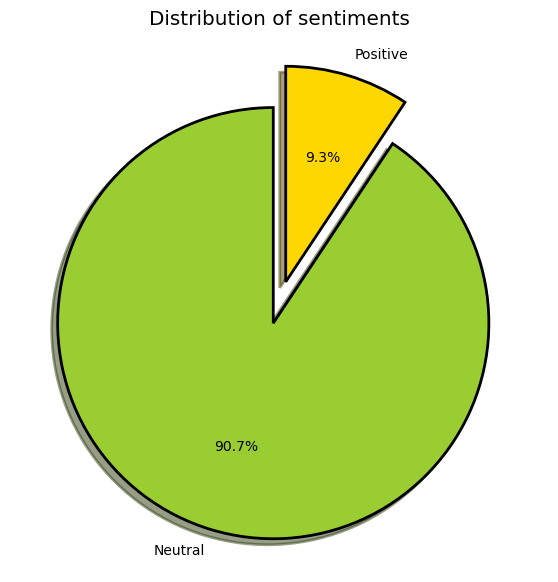

In [22]:
# Plot the distribution of sentiments
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = comments_df['sentiment'].value_counts()

# Ensure explode has the same number of elements as there are unique sentiments
explode = [0.1] * len(tags)

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiments')
plt.show()